  PATIENTS         ID GENOTYPE
9  CHU181b  rs1131603      0/1
6  CHU181b  rs1141321      0/1
2   CHU18a  rs1141321      0/1
5  CHU181b  rs1801133      0/1
0   CHU18a  rs1801133      1/1
7  CHU181b  rs1801222      0/1
3   CHU18a  rs1801222      1/1
1   CHU18a  rs2270655      0/1
8  CHU181b  rs3742801      0/1
4   CHU18a   rs602662      0/1
   PATIENTS         ID GENOTYPE
11  CHU181b  rs1131603      0/1
8   CHU181b  rs1141321      0/1
3    CHU18a  rs1141321      0/1
7   CHU181b  rs1801133      0/1
0    CHU18a  rs1801133      1/1
1    CHU18a  rs1801133      1/1
9   CHU181b  rs1801222      0/1
4    CHU18a  rs1801222      1/1
5    CHU18a  rs1801222      1/1
2    CHU18a  rs2270655      0/1
10  CHU181b  rs3742801      0/1
6    CHU18a   rs602662      0/1
ID
rs1131603    1
rs1141321    2
rs1801133    3
rs1801222    3
rs2270655    1
rs3742801    1
rs602662     1
dtype: int64
None


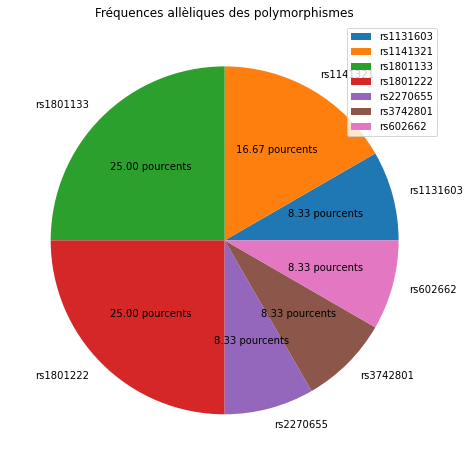

In [1]:
vitamineb12 =["rs2336573","rs1131603","rs3742801","rs2270655","rs12272669","rs34324219","rs7788053","rs602662","rs1801222","rs41281112", "rs1141321","rs652197","rs1801133"]

test =["rs9803031","rs10267"]


class Recherche_polymorph():

  def __init__(self, poly):
    self.poly= poly
    import os
    import glob
    chemin = os.getcwd()
    self.liste_fichier = glob.glob(chemin+"/*.vcf")

  def variant_genetique_liste2(self):
    
    import re
    patient_gene = []
    
    for f in self.liste_fichier:
        fichier = open(f, "r")
        patient = fichier.read()
        data = patient.split("\n")
        liste = []
        geneti = []
        genetique =[]
        
        liste = [d.split("\t")for d in data]
      
        regex = "##"
        for l in liste :
          if (re.search(regex,l[0])is not None):
            l.clear()

        geneti = [le for le in liste if le != []]
        geneti = geneti[0:len(geneti)-1]  
        regex1 = "\;"
        
        for ge in geneti:
          if (re.search(regex1, ge[2])is not None) :
            ge[2]=ge[2].split(";")
        
        for ge in geneti:
          genetique.append(ge)
          if ge[2]==list(ge[2]):
            i = 1
            lns =[]
            
            while(i<len(ge[2])):
              ni = list(ge)
              lns.append(ni)
              i+=1
            
            for ni in lns:
              ni[2] = ni[2].pop()
              ni[2]= "".join(ni[2])
              genetique.append(ni)
            
            ge[2]= ge[2].pop()
            ge[2]="".join(ge[2])

        
        id_patient = genetique[0][9]
        
        for g in genetique:
          for ln in self.poly:
            if(g[2]==ln):
              resultat = id_patient+":"+ ln+":"+g[9]
              resultat = resultat.split(":")
              resultat = resultat[0:3]
              patient_gene.append(resultat)
    return(patient_gene) 
  
  def tableau_initial(self):
    import pandas
    tab = self.variant_genetique_liste2()
    p = pandas.DataFrame(tab, columns = ["PATIENTS","ID", "GENOTYPE"])
    vf = p.sort_values(by= ["ID","PATIENTS"], ascending = True)
    return vf


  def new_tableau(self):
    import pandas
    liste3 = []
    tableau = self.variant_genetique_liste2()
    for t in tableau:
      liste3.append(t)
      if t[2] == '1/1':
        liste3.append(t)
    p= pandas.DataFrame(liste3, columns = ["PATIENTS", "ID", "GENOTYPE"])
    yx= p.sort_values(by = ["ID","PATIENTS"], ascending = True)
    return yx


  def nb_polymorphisme (self):
    tableau = self.new_tableau()
    return tableau.groupby("ID").size() #tableau["ID"].value_counts()



  def camembert(self):
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    tableau = self.new_tableau()
    table = self.nb_polymorphisme()
    table1 = [n for n in table]
    tableau2 =[r for r in tableau['ID']]
    tableau3 = sorted(set(tableau2))
    plt.figure(figsize = (8, 8))
    plt.pie(table1, labels = tableau3,autopct="%1.2f pourcents")
    plt.legend()
    plt.title("Fréquences allèliques des polymorphismes")
    return plt.savefig('plot3.png')



#sorted(permet de classer les éléments d'une liste dans un ordre croissant en général ou decroissant).
vitamineb12 = Recherche_polymorph(vitamineb12)

tableauinitial = vitamineb12.tableau_initial()

tableauinfo= vitamineb12.new_tableau() 

frequence = vitamineb12.nb_polymorphisme()

graph = vitamineb12.camembert()

print(tableauinitial)

print(tableauinfo)

print(frequence)

print(graph)
